# <p style="text-align:center;">Lập trình song song - CQ2021/21</p>
# <p style="text-align:center;">ĐỒ ÁN CUỐI KỲ</p>
## <p style="text-align:center;">Triển khai và tối ưu ANN</p>
### <p style="text-align:center;">Nhóm 8</p>

# 1. Thành viên
MSSV | Họ tên
--- | ---
21120403 | Nguyễn Hoàng Quân
21120407 | Trần Phan Phúc Ân
21120429 | Lưu Kiến Đạt

# 2. Yêu cầu đề bài

- ## Triển khai và tối ưu một ANN truyền thống.
- ## Bộ dữ liệu sử dụng sẽ là Fashion-MNIST của Zalando.
- ## Mục tiêu tìm hiểu: Sử dụng CUDA để triển khai và tối ưu ANN, trình bày được cách tiếp cận của các phương pháp tối ưu.

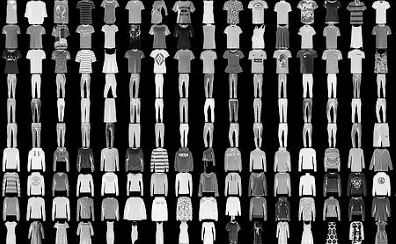

# 3. Tổng quan

## a. ANN

- Theo `Wikipedia`, mạng neural nhân tạo là một mô hình toán học hay mô hình tính toán được xây dựng dựa trên các mạng neural sinh học. Nó gồm có một nhóm các neural nhân tạo nối với nhau, và xử lý thông tin bằng cách truyền theo các kết nối và tính giá trị mới tại các neural.  
- ANN gồm 3 thành phần chính: Input layer, Hidden layer, Output layer. Trong đó, có thể có nhiều Hidden layer.

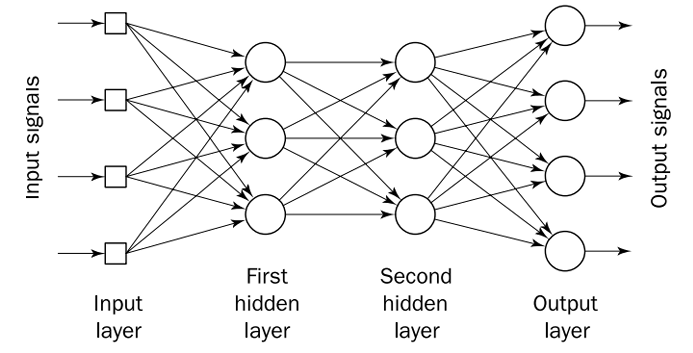

# 3. Build & Run

## Kết nối với Google Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
%cd /content/drive/MyDrive/
%ls

/content/drive/MyDrive
 05_Research#01.zip   ANN-Final-Project/    'Colab Notebooks'/           LTSS/
 ANN_Fashion_MNIST/   ANN-Final-Project-2/   jdk-8u202-windows-x64.exe   video1264118106.mp4


In [30]:
!rm -r ANN_Fashion_MNIST

## Clone Repositories từ Github về và thực hiện lưu vào drive

In [31]:
!git clone https://github.com/NgHoangQuan2204/ANN_Fashion_MNIST.git

Cloning into 'ANN_Fashion_MNIST'...
remote: Enumerating objects: 2289, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 2289 (delta 142), reused 115 (delta 62), pack-reused 2090 (from 1)
Receiving objects: 100% (2289/2289), 34.15 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Updating files: 100% (1885/1885), done.


In [32]:
projectDirRootName = "/content/drive/MyDrive/ANN_Fashion_MNIST/"

In [33]:
%cd {projectDirRootName}
%ls

/content/drive/MyDrive/ANN_Fashion_MNIST
CMakeLists.txt  data/                  LICENSE    report.ipynb  third_party/
config.h        demo_Fashion_MNIST.cc  README.md  src/


In [34]:
%rm -r build
%mkdir build
%cd build
%ls

rm: cannot remove 'build': No such file or directory
/content/drive/MyDrive/ANN_Fashion_MNIST/build


## Khởi chạy CMake

In [35]:
!cmake ..

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The CXX compiler identification is GNU 11.4.0
-- The CUDA compiler identification is NVIDIA 12.2.140 with host compiler GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
-- Configuring done (4.6s)
-- Generating done (0.3s)
-- Bui

In [36]:
!make

[ -9%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/mnist.cc.o
[  0%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/network.cc.o
[  9%] Building CUDA object src/CMakeFiles/MiniDNNLib.dir/layer/cuda_utilities.cu.o
[ 18%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/layer/dense.cc.o
[ 27%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/layer/relu.cc.o
[ 36%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/layer/softmax.cc.o
[ 45%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/loss/cross_entropy_loss.cc.o
[ 54%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/optimizer/sgd.cc.o
[ 63%] Linking CXX static library libMiniDNNLib.a
[ 63%] Built target MiniDNNLib
[ 72%] Building CXX object CMakeFiles/demo.dir/demo_Fashion_MNIST.cc.o
[ 81%] Linking CXX executable demo
[ 81%] Built target demo


## Tính toán trên Host

### Version 1: Tính tuần tự phép nhân ma trận



In [42]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 1 1 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 1

0-th batch, loss: 2.29704
100-th batch, loss: 2.05682
200-th batch, loss: 1.29119
300-th batch, loss: 0.876213
400-th batch, loss: 0.696549
500-th batch, loss: 0.792753
Test acc: 0.731

0-th batch, loss: 0.604908
100-th batch, loss: 0.559792
200-th batch, loss: 0.558594
300-th batch, loss: 0.676402
400-th batch, loss: 0.550005
500-th batch, loss: 0.595025
Test acc: 0.8057

0-th batch, loss: 0.42618
100-th batch, loss: 0.414777
200-th batch, loss: 0.44024
300-th batch, loss: 0.615668
400-th batch, loss: 0.516792
500-th batch, loss: 0.510114
Test acc: 0.8241

Average accuracy: 0.786933
Train time: 7722 s
Average forward times:
Layer 1: 0 ms
Layer 2: 0.230681 ms
Layer 3: 313.999 ms
Layer 4: 0.226775 ms
Layer 5: 24.6263 ms
Layer 6: 0.318624 ms
Average backward times:
Layer 1: 0 m

# Tính toán trên Device

### Version 2: Song song hóa việc tính toán phép nhân ma trận

Thực hiện phép nhân hai ma trận A (m x n) và B (n x k) trên GPU.

In [41]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 2 2 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 2

0-th batch, loss: 2.29704
100-th batch, loss: 2.24769
200-th batch, loss: 1.9674
300-th batch, loss: 1.4336
400-th batch, loss: 1.08982
500-th batch, loss: 0.963414
Test acc: 0.6567

0-th batch, loss: 0.83105
100-th batch, loss: 0.744537
200-th batch, loss: 0.807077
300-th batch, loss: 0.737341
400-th batch, loss: 0.618878
500-th batch, loss: 0.671799
Test acc: 0.7698

0-th batch, loss: 0.516766
100-th batch, loss: 0.49816
200-th batch, loss: 0.53324
300-th batch, loss: 0.679849
400-th batch, loss: 0.561464
500-th batch, loss: 0.558168
Test acc: 0.8073

Average accuracy: 0.7446
Train time: 511 s
Average forward times:
Layer 1: 0 ms
Layer 2: 0.220079 ms
Layer 3: 28.1041 ms
Layer 4: 0.22129 ms
Layer 5: 22.3592 ms
Layer 6: 0.311647 ms
Average backward times:
Layer 1: 0 ms
Layer 

### Version 3: Tối ưu bằng tiled shared memory

- Thực hiện phép nhân ma trận A (m x n) và B (n x k) trên GPU, nhưng được tối ưu hóa bằng kỹ thuật Tiled Shared Memory.

- Cải thiện hiệu suất bằng cách giảm số lần truy cập bộ nhớ toàn cục (Global Memory) và thay vào đó sử dụng Shared Memory sẽ nhanh hơn nhiều.

In [38]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 3 3 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 3

0-th batch, loss: 2.29704
100-th batch, loss: 2.24769
200-th batch, loss: 1.9674
300-th batch, loss: 1.4336
400-th batch, loss: 1.08982
500-th batch, loss: 0.963414
Test acc: 0.6567

0-th batch, loss: 0.83105
100-th batch, loss: 0.744537
200-th batch, loss: 0.807077
300-th batch, loss: 0.737341
400-th batch, loss: 0.618878
500-th batch, loss: 0.671799
Test acc: 0.7698

0-th batch, loss: 0.516766
100-th batch, loss: 0.49816
200-th batch, loss: 0.53324
300-th batch, loss: 0.679849
400-th batch, loss: 0.561464
500-th batch, loss: 0.558168
Test acc: 0.8073

Average accuracy: 0.7446
Train time: 506 s
Average forward times:
Layer 1: 0 ms
Layer 2: 0.224982 ms
Layer 3: 27.9518 ms
Layer 4: 0.220011 ms
Layer 5: 23.2365 ms
Layer 6: 0.313674 ms
Average backward times:
Layer 1: 0 ms
Layer

### Version 4: Tối ưu bằng việc sử dụng shared memory cùng với input matrix unrolling.

Sử dụng phương thức Unrolling trong vòng lặp

- Sử dụng kỹ thuật được gọi là "loop unrolling" với tham số UNROLL_FACTOR. Việc này giúp cải thiện hiệu suất bằng cách giảm số lần lặp trong vòng lặp bên trong, từ đó giảm chi phí overhead của vòng lặp và tăng số lần lệnh được thực thi trong mỗi chu kỳ của một thread.
-  Khi sử dụng unrolling trong matrixMultiplicationKernel_3, các chỉ số được tính toán để đảm bảo rằng mỗi thread sẽ xử lý một phần của dữ liệu tương ứng với giá trị UNROLL_FACTOR. Điều này cho phép kernel phân phối công việc một cách hiệu quả hơn giữa các thread, giảm thiểu sự trùng lặp và chờ đợi không cần thiết.

In [39]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 4 4 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 4

0-th batch, loss: 2.28473
100-th batch, loss: 1.93651
200-th batch, loss: 1.33266
300-th batch, loss: 0.863647
400-th batch, loss: 0.739346
500-th batch, loss: 0.818349
Test acc: 0.729

0-th batch, loss: 0.626899
100-th batch, loss: 0.537373
200-th batch, loss: 0.587854
300-th batch, loss: 0.735402
400-th batch, loss: 0.602848
500-th batch, loss: 0.633481
Test acc: 0.7934

0-th batch, loss: 0.453494
100-th batch, loss: 0.402387
200-th batch, loss: 0.455085
300-th batch, loss: 0.675088
400-th batch, loss: 0.566828
500-th batch, loss: 0.554109
Test acc: 0.8147

Average accuracy: 0.779033
Train time: 511 s
Average forward times:
Layer 1: 0 ms
Layer 2: 0.221194 ms
Layer 3: 27.644 ms
Layer 4: 0.219223 ms
Layer 5: 23.3489 ms
Layer 6: 0.317195 ms
Average backward times:
Layer 1: 0 m

### Version 5: Tối ưu bằng cách sử dụng FP16 cho tính toán.

- Chuyển dữ liệu từ float(32 bit) thành half(16 bit) để tăng tốc độ tính toán và giảm không gian lưu trữ.

In [40]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 5 5 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 5

0-th batch, loss: 2.29703
100-th batch, loss: 2.24794
200-th batch, loss: 1.96785
300-th batch, loss: 1.43454
400-th batch, loss: 1.08932
500-th batch, loss: 0.963197
Test acc: 0.6582

0-th batch, loss: 0.832356
100-th batch, loss: 0.748205
200-th batch, loss: 0.803876
300-th batch, loss: 0.734892
400-th batch, loss: 0.619211
500-th batch, loss: 0.674558
Test acc: 0.7701

0-th batch, loss: 0.516038
100-th batch, loss: 0.497142
200-th batch, loss: 0.530313
300-th batch, loss: 0.673217
400-th batch, loss: 0.565724
500-th batch, loss: 0.559334
Test acc: 0.8069

Average accuracy: 0.745067
Train time: 516 s
Average forward times:
Layer 1: 0 ms
Layer 2: 0.223078 ms
Layer 3: 28.1185 ms
Layer 4: 0.219744 ms
Layer 5: 22.8668 ms
Layer 6: 0.321101 ms
Average backward times:
Layer 1: 0 m

## Thống kê các version
Version | Average Accuracy | Train Time (s)
--- | --- | ---
1 | 0.786933 | 7722
2 | 0.7446 | 514
3 | 0.7446 | 506
4 | 0.779033 | 511
5 | 0.745067 | 516